<h3>Importing libraries<h3>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
asag=pd.read_csv(r'C:\Users\admin\Desktop\mohler_dataset_edited.csv')

In [3]:
asag.head(7)

,id,question,desired_answer,student_answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0,3.0
5,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To find problem and errors in a program before...,2.0,2.0,2.0
6,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To address major issues in the creation of the...,3.0,2.0,2.5


In [4]:
for col in asag.columns:
    print(col)


id
question
desired_answer
student_answer
score_me
score_other
score_avg


<h4>Data exploration</h4>

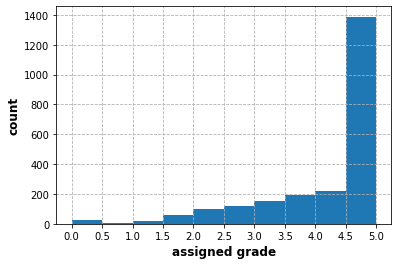

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
count = asag['score_avg'].value_counts(sort=False)
hist = asag['score_avg'].hist(grid=False)
ax.set_xticks(np.arange(0, 5.5, 0.5))
ax.grid(linestyle='--')

plt.ylabel('count', fontsize=12, weight='bold')
plt.xlabel('assigned grade', fontsize=12, weight='bold')

plt.show()

<h3>Pre Processing</h>

<h4> Converting to lowercase</h4>

In [6]:
def clean_lowercase(review_text):
    return str(review_text).lower()
asag['desired_answer'] = asag['desired_answer'].apply(clean_lowercase)
asag['student_answer'] = asag['student_answer'].apply(clean_lowercase)


<h4>Tokenization</h4>

In [7]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def clean_tokenization(review_text):
    return word_tokenize(review_text)
asag['desired_answer'] = asag['desired_answer'].apply(clean_tokenization)
asag['student_answer'] = asag['student_answer'].apply(clean_tokenization)


In [9]:
asag.head()

,id,question,desired_answer,student_answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,"[to, simulate, the, behaviour, of, portions, o...","[high, risk, problems, are, address, in, the, ...",4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,"[to, simulate, the, behaviour, of, portions, o...","[to, simulate, portions, of, the, desired, fin...",5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,"[to, simulate, the, behaviour, of, portions, o...","[a, prototype, program, simulates, the, behavi...",5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,"[to, simulate, the, behaviour, of, portions, o...","[defined, in, the, specification, phase, a, pr...",5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,"[to, simulate, the, behaviour, of, portions, o...","[it, is, used, to, let, the, users, have, a, f...",3.0,3.0,3.0


<h4>Stopword removal</h4>

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]
asag['student_answer'] = asag['student_answer'].apply(clean_stopwords)
asag['desired_answer'] = asag['desired_answer'].apply(clean_stopwords)


In [12]:
asag.head()

,id,question,desired_answer,student_answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portions, desired, softw...","[high, risk, problems, address, prototype, pro...",4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portions, desired, softw...","[simulate, portions, desired, final, product, ...",5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portions, desired, softw...","[prototype, program, simulates, behaviors, por...",5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portions, desired, softw...","[defined, specification, phase, prototype, sti...",5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portions, desired, softw...","[used, let, users, first, idea, completed, pro...",3.0,3.0,3.0


<h4>Lemmatization</h4>

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemma=WordNetLemmatizer()
def clean_lemmatization(token):
    return [lemma.lemmatize(word=w,pos='v') for w in token]
asag['student_answer'] = asag['student_answer'].apply(clean_lemmatization)
asag['desired_answer'] = asag['desired_answer'].apply(clean_lemmatization)


In [15]:
asag.head()

,id,question,desired_answer,student_answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portion, desire, softwar...","[high, risk, problems, address, prototype, pro...",4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portion, desire, softwar...","[simulate, portion, desire, final, product, qu...",5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portion, desire, softwar...","[prototype, program, simulate, behaviors, port...",5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portion, desire, softwar...","[define, specification, phase, prototype, stim...",5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,"[simulate, behaviour, portion, desire, softwar...","[use, let, users, first, idea, complete, progr...",3.0,3.0,3.0


<h4>Converting back to string to create feature vectors</h4>

In [16]:
def convert_to_string(review_list):
    return ' '.join(review_list)
asag['student_answer'] = asag['student_answer'].apply(convert_to_string)
asag['desired_answer'] = asag['desired_answer'].apply(convert_to_string)


<h3>Word embedding/vector</h3>

In [17]:
import spacy
spacy.load('en_core_web_md')
nlp = spacy.load('en_core_web_md')

In [ ]:
#from gensim.models import KeyedVectors
#!pip install gemsim
#pip install -U pip setuptools wheel

In [ ]:
#!pip install gemsim

In [ ]:
#!python -m spacy download en_core_web_md
#nlp = spacy.load('en_core_web_lg')

<h4>feature vector for desired answer</h4>


In [18]:
#list for desire answer feature vector
des_fv=[]
for index, row in asag.iterrows():
    doc=nlp(row['desired_answer'])   
    des_fv.append(doc.vector)    

<h4>feature vector for student's answers</h4>

In [19]:
ans_fv=[]
for index, row in asag.iterrows():
    doc=nlp(row['student_answer'])   
    ans_fv.append(doc.vector)

<h4>cosine similarity</h4>

In [20]:
def cosine_similarity(a, b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))


In [21]:
cos_sim=[]
for i in range(len(ans_fv)):
    cos_sim.append(cosine_similarity(des_fv[i], ans_fv[i]))

In [22]:
asag["cos_sim"]=cos_sim

In [23]:
for col in asag.columns:
    print(col)

id
question
desired_answer
student_answer
score_me
score_other
score_avg
cos_sim


<h3>Training</h3>

<h4>Target variable</h4>

In [24]:

asag.dropna(inplace = True)
np.where(asag.cos_sim >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [25]:
y = asag.score_avg

<h4>Feature vector</h4>

In [26]:
x = asag[['cos_sim']]

In [27]:
#indices_to_keep = ~asag.isin([np.nan, np.inf, -np.inf]).any(1)

In [28]:
#def clean_dataset(df):
#    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
 #   df.dropna(inplace=True)
  #  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
   # return df[indices_to_keep]

In [29]:
#clean_dataset(asag)

In [30]:
#to remove infinite or NaN error
#def _assert_all_finite(X):
 #   """Like assert_all_finite, but only for ndarray."""
  #  X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
   # if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
    #        and not np.isfinite(X).all()):
     #   raise ValueError("Input contains NaN, infinity"
      #                   " or a value too large for %r." % X.dtype)

In [31]:
#_assert_all_finite(x)

In [32]:
print(x.shape, y.shape)

(2268, 1) (2268,)


<h4>Train test split</h4>

In [33]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(x, y, test_size=0.3, random_state = 0)

In [34]:
#pip install -U scikit-learn
#pip install seaborn

<h4>Linear regression</h4>

In [35]:
from sklearn import linear_model

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
regr = LinearRegression()
regr.fit(train_X, train_y)

LinearRegression()

In [38]:
#sns.set_theme(color_codes=True)
#tips = sns.load_dataset("tips")

<AxesSubplot:xlabel='score_avg', ylabel='cos_sim'>

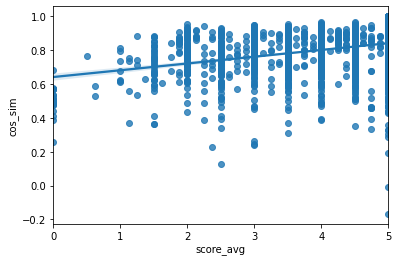

In [39]:
sns.regplot(x='score_avg', y='cos_sim', data=asag)

<h4>Isotonic regression</h4>

In [40]:
from sklearn.isotonic import IsotonicRegression

In [41]:
is_regr = IsotonicRegression()
is_regr.fit(train_X, train_y)

IsotonicRegression()

In [42]:
predicted_marks_iso = is_regr.predict(val_X)
#Removing nan and infinite values
iso_pred = np.nan_to_num(predicted_marks_iso)

<h4>K nearest neighbour</h4>

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor()
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [45]:
knn_pred=knn.predict(val_X)

<h4>Descision Tree</h4>

In [46]:
from sklearn.tree import DecisionTreeRegressor
des_tree = DecisionTreeRegressor(random_state=1)
des_tree.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [47]:
dt_pred=knn.predict(val_X)

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [49]:
rf_pred = forest.predict(val_X)

<h3>Model validation</h4>

<h4> Mean absolute error for linear regression</h4>

In [50]:
from sklearn.metrics import mean_absolute_error
predicted_marks = regr.predict(val_X)
mean_absolute_error(val_y, predicted_marks)

0.8264346016691339

<h4> Mean absolute error for Isotonic regression</h4>

In [51]:
mean_absolute_error(val_y, iso_pred)

0.8202646603930269

<h4> Mean absolute error for K nearest neighbour</h4>

In [52]:
mean_absolute_error(val_y, knn_pred)

0.8621879588839942

<h4> Mean absolute error for Decision Tree</h4>

In [53]:
mean_absolute_error(val_y, dt_pred)

0.8621879588839942

<h4> Mean absolute error for Random Forest</h4>

In [57]:
mean_absolute_error(val_y, rf_pred)

0.8622794297601567

In [54]:
l=[]
lr=[]
ir=[]
knn=[]
dt=[]
rf=[]
k=0.16
for i in range(10):
    k+=0.02
    l.append(k)
    train_X, val_X, train_y, val_y = train_test_split(x, y, test_size=k, random_state = 0)
    #linear regression values
    regr = LinearRegression()
    regr.fit(train_X, train_y)
    predicted_marks_lr = regr.predict(val_X)
    lr.append(mean_absolute_error(val_y, predicted_marks_lr))
#Isotonic regression
    is_regr = IsotonicRegression()
    is_regr.fit(train_X, train_y)
    predicted_marks_ir = is_regr.predict(val_X)
    #ir.append(mean_absolute_error(val_y, predicted_marks_ir))
#knn values
    knn_m = KNeighborsRegressor()
    knn_m.fit(train_X, train_y)
    predicted_marks = knn_m.predict(val_X)
    knn.append(mean_absolute_error(val_y, predicted_marks))
#decision tree values
    des_tree = DecisionTreeRegressor(random_state=1)
    des_tree.fit(train_X, train_y)
    predicted_marks = des_tree.predict(val_X)
    dt.append(mean_absolute_error(val_y, predicted_marks))
#random forest
    forest = RandomForestRegressor(random_state=1)
    forest.fit(train_X, train_y)
    predicted_marks = forest.predict(val_X)
    rf.append(mean_absolute_error(val_y, predicted_marks))


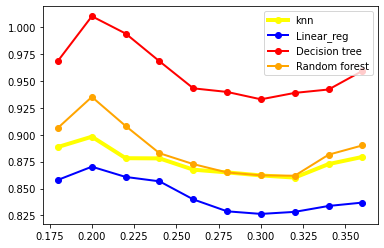

In [55]:
df=pd.DataFrame({'Test_size': l, 'Linear_reg': lr,  'knn': knn, 'Decision tree': dt, 'Random forest': rf })
#Isotonic_reg': ir,
# multiple line plots
plt.plot( 'Test_size', 'knn', data=df, marker='o', color='yellow', linewidth=4)
plt.plot( 'Test_size', 'Linear_reg', data=df, marker='o', color='blue', linewidth=2)
#plt.plot( 'Test_size', 'Isotonic_reg', data=df, marker='o', color='green', linewidth=2)
plt.plot( 'Test_size', 'Decision tree', data=df, marker='o', color='red', linewidth=2)
plt.plot( 'Test_size', 'Random forest', data=df, marker='o', color='orange', linewidth=2)
# show legend
plt.legend()

# show graph
plt.show()